# DATA CLEANING IN SQL
#### Data cleaning is an essential process in any data analysis project. This documentation outlines the steps taken to clean data in SQL queries for a portfolio project involving Nashville Housing data.


#### Here are the steps:<br>

- Standardize the date format using the CONVERT function.<br>
* Populate missing Property Address data by joining data from different tables and filling in the missing data.<br>
- Break out the Property Address into individual columns, including Address, City, and State, using the SUBSTRING function.<br>
* Break out the Owner Address into individual columns, including Address, City, and State, using the PARSENAME and REPLACE <br>functions.<br>
- Change the "Sold as Vacant" field values from Y/N to Yes/No using the CASE function.<br>
* Remove duplicates using the ROW_NUMBER function, and then delete duplicates.<br>


<p style="text-align:center;">
    <a href="https://github.com/AllenDataAnalyst/My-Portfolio-Project/tree/main/SQL/Data%20Cleaning">Click here to download SQL queries and Nashville Housing data</a>
</p>



To check for the dataset, you can use the following SQL code: <br>

SELECT *<br>
FROM PorfolioProjectSQL.dbo.NashvilleHousing

The output of the SQL query will be displayed below ↴↴↴

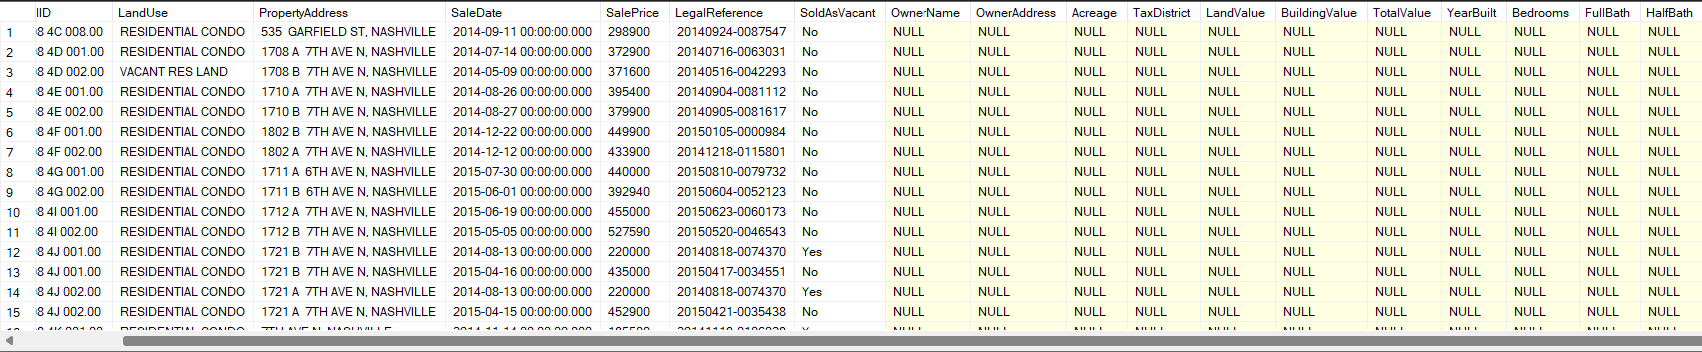

In [60]:
from IPython import display
display.Image("https://raw.githubusercontent.com/AllenDataAnalyst/AllenTheAnalyst.github.io/main/images/data%20cleaning/data.png")

### After reviewing the data, I have identified some data quality issues that need to be addressed. Here are some of the issues we found:

#### 1. Standardize Date Format
#### The first step in data cleaning is to ensure that the data is in a standardized format. This is particularly important when dealing with dates, which can be stored in different formats. The code uses the CONVERT function to standardize the SaleDate format and updates the NashvilleHousing table.

Standardize Date Format<br>
code: <br>


Select SaleDate, CONVERT(Date,SaleDate)<br>
From PorfolioProjectSQL.dbo.NashvilleHousing<br>


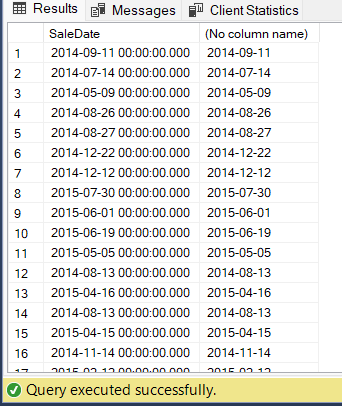

###### Updating SaleDate Format:<br>
code: <br>
Update NashvilleHousing<br>
SET SaleDate = CONVERT(Date,SaleDate)<br>

#### If this code does not work as expected<br>


alternative code:<br>


ALTER TABLE NashvilleHousing<br>
Add SaleDateConverted Date;<br>

Update NashvilleHousing<br>
SET SaleDateConverted = CONVERT(Date,SaleDate)<br>

Select SaleDateConverted, CONVERT(Date,SaleDate)<br>
From PorfolioProjectSQL.dbo.NashvilleHousing<br>


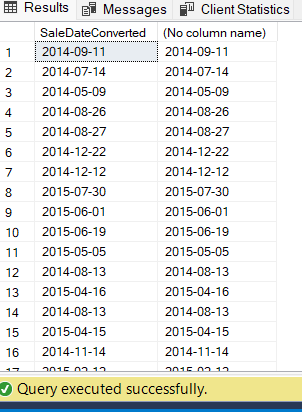

#### 2.Populate Property Address Data
Retrieve all records in the NashvilleHousing table and order them by ParcelID <br>
code:<br>
Select *<br>
From PorfolioProjectSQL.dbo.NashvilleHousing<br>
order by ParcelID<br>


In [ ]:
from IPython import display
display.Image("https://raw.githubusercontent.com/AllenDataAnalyst/AllenTheAnalyst.github.io/main/images/data%20cleaning/data3.png")

This SQL code retrieves the ParcelID and PropertyAddress columns from the NashvilleHousing table, and then joins the table with itself on the ParcelID column to find any duplicate entries with missing PropertyAddress values. The ISNULL function is used to return the non-null PropertyAddress value from either table, and the result is a table of ParcelIDs with their corresponding PropertyAddresses, where missing values have been filled in.<br>
code:<br>
Select a.ParcelID, a.PropertyAddress, b.ParcelID, b.PropertyAddress, ISNULL(a.PropertyAddress,b.PropertyAddress)<br>
From PorfolioProjectSQL.dbo.NashvilleHousing a<br>
JOIN PorfolioProjectSQL.dbo.NashvilleHousing b<br>
	on a.ParcelID = b.ParcelID<br>
	AND a.[UniqueID ] <> b.[UniqueID ]<br>
Where a.PropertyAddress is null<br>


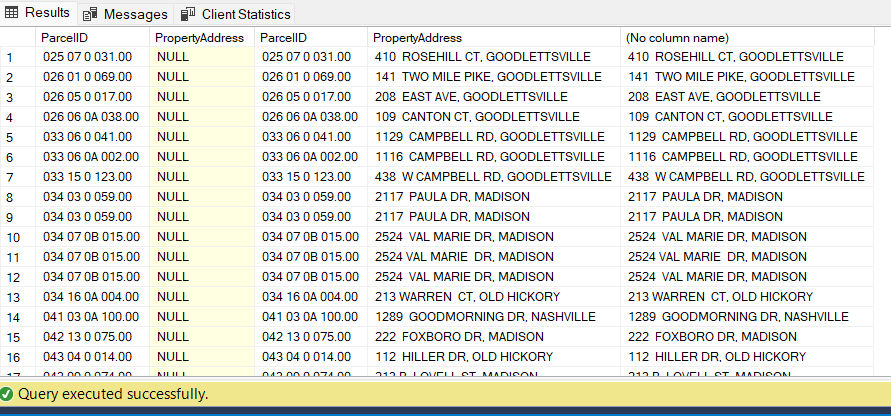


##### Updating data
Update a <br>
SET PropertyAddress = ISNULL(a.PropertyAddress,b.PropertyAddress)<br>
From PorfolioProjectSQL.dbo.NashvilleHousing a<br>
JOIN PorfolioProjectSQL.dbo.NashvilleHousing b<br>
	on a.ParcelID = b.ParcelID<br>
	AND a.[UniqueID ] <> b.[UniqueID ]<br>
Where a.PropertyAddress is null<br>

#### 3. Breaking out Address into Individual Columns (Address, City, State)
The next step is to break down the PropertyAddress field into individual columns for Address, City, and State using the SUBSTRING function. The code then updates the NashvilleHousing table with the newly created columns.

code:

Select PropertyAddress<br>
From PorfolioProjectSQL.dbo.NashvilleHousing<br>

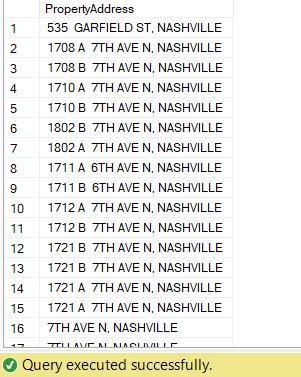

This code splits the PropertyAddress column in the NashvilleHousing table into Address and City columns.<br>


SELECT<br>
SUBSTRING(PropertyAddress, 1, CHARINDEX(',', PropertyAddress) -1 ) as Address<br>
, SUBSTRING(PropertyAddress, CHARINDEX(',', PropertyAddress) + 1 , LEN(PropertyAddress)) as Address<br>
From PorfolioProjectSQL.dbo.NashvilleHousing<br>

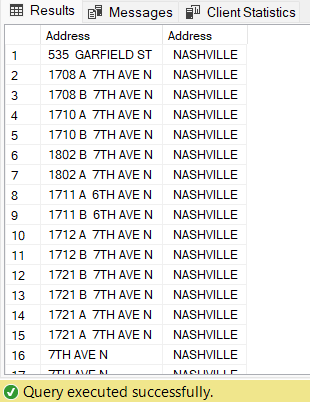

After checking the code, it ran as intended.<br>

This SQL code adds two new columns to the table "NashvilleHousing" and __updates__ their values by splitting the existing <br><br>"PropertyAddress" column into two separate columns "PropertySplitAddress" and "PropertySplitCity<br>

__code:__

ALTER TABLE NashvilleHousing
Add PropertySplitAddress Nvarchar(255);

Update NashvilleHousing
SET PropertySplitAddress = SUBSTRING(PropertyAddress, 1, CHARINDEX(',', PropertyAddress) -1 )


ALTER TABLE NashvilleHousing
Add PropertySplitCity Nvarchar(255);

Update NashvilleHousing
SET PropertySplitCity = SUBSTRING(PropertyAddress, CHARINDEX(',', PropertyAddress) + 1 , LEN(PropertyAddress))



In [21]:

import pypyodbc as podbc
import pandas as pd
conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-D0VPHAK\SQLEXPRESS;"
                     "Database=PorfolioProjectSQL;"
                     "Trusted_Connection=yes;")

# running the SQL query i need
SQL_Query = pd.read_sql_query('''
Select *
From PorfolioProjectSQL.dbo.NashvilleHousing
''', conn2)

#conn.close()

# Viz
SQL_Query.head(40)

,uniqueid,parcelid,landuse,propertyaddress,saledate,saleprice,legalreference,soldasvacant,ownername,owneraddress,acreage,taxdistrict,landvalue,buildingvalue,totalvalue,yearbuilt,bedrooms,fullbath,halfbath,saledateconverted,propertysplitaddress,propertysplitcity
0,21911.0,081 08 4C 008.00,RESIDENTIAL CONDO,"535 GARFIELD ST, NASHVILLE",2014-09-11,298900.0,20140924-0087547,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-11,535 GARFIELD ST,NASHVILLE
1,18949.0,081 08 4D 001.00,RESIDENTIAL CONDO,"1708 A 7TH AVE N, NASHVILLE",2014-07-14,372900.0,20140716-0063031,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-14,1708 A 7TH AVE N,NASHVILLE
2,15993.0,081 08 4D 002.00,VACANT RES LAND,"1708 B 7TH AVE N, NASHVILLE",2014-05-09,371600.0,20140516-0042293,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-09,1708 B 7TH AVE N,NASHVILLE
3,20408.0,081 08 4E 001.00,RESIDENTIAL CONDO,"1710 A 7TH AVE N, NASHVILLE",2014-08-26,395400.0,20140904-0081112,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26,1710 A 7TH AVE N,NASHVILLE
4,20409.0,081 08 4E 002.00,RESIDENTIAL CONDO,"1710 B 7TH AVE N, NASHVILLE",2014-08-27,379900.0,20140905-0081617,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-27,1710 B 7TH AVE N,NASHVILLE
5,25561.0,081 08 4F 001.00,RESIDENTIAL CONDO,"1802 B 7TH AVE N, NASHVILLE",2014-12-22,449900.0,20150105-0000984,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-22,1802 B 7TH AVE N,NASHVILLE
6,25562.0,081 08 4F 002.00,RESIDENTIAL CONDO,"1802 A 7TH AVE N, NASHVILLE",2014-12-12,433900.0,20141218-0115801,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-12,1802 A 7TH AVE N,NASHVILLE
7,35538.0,081 08 4G 001.00,RESIDENTIAL CONDO,"1711 A 6TH AVE N, NASHVILLE",2015-07-30,440000.0,20150810-0079732,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-30,1711 A 6TH AVE N,NASHVILLE
8,33768.0,081 08 4G 002.00,RESIDENTIAL CONDO,"1711 B 6TH AVE N, NASHVILLE",2015-06-01,392940.0,20150604-0052123,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-01,1711 B 6TH AVE N,NASHVILLE
9,33769.0,081 08 4I 001.00,RESIDENTIAL CONDO,"1712 A 7TH AVE N, NASHVILLE",2015-06-19,455000.0,20150623-0060173,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-19,1712 A 7TH AVE N,NASHVILLE


Now, we can __split the OwnerAddress column__ using the __PARSENAME__ function. Instead of using SUBSTRING, CHARINDEX, and LEN, we can use a more concise code by utilizing the PARSENAME function.

In [22]:

# running the SQL query i need
SQL_Query = pd.read_sql_query('''Select OwnerAddress
From PorfolioProjectSQL.dbo.NashvilleHousing where owneraddress is not null''', conn2)



# Viz
SQL_Query.head(10)


,owneraddress
0,"1721 26TH AVE N, NASHVILLE, TN"
1,"2607 DELK AVE, NASHVILLE, TN"
2,"2511 BUCHANAN ST, NASHVILLE, TN"
3,"2514 DELK AVE, NASHVILLE, TN"
4,"2519 DELK AVE, NASHVILLE, TN"
5,"2503 DELK AVE, NASHVILLE, TN"
6,"1725 25TH AVE N, NASHVILLE, TN"
7,"1725 25TH AVE N, NASHVILLE, TN"
8,"2505 FINLAND ST, NASHVILLE, TN"
9,"2506 OSAGE ST, NASHVILLE, TN"


__code:__ <br>
Select<br>
PARSENAME(REPLACE(OwnerAddress, ',', '.') , 3)<br>
,PARSENAME(REPLACE(OwnerAddress, ',', '.') , 2)<br>
,PARSENAME(REPLACE(OwnerAddress, ',', '.') , 1)<br>
From PorfolioProjectSQL.dbo.NashvilleHousing<br>

In [23]:

import pypyodbc as podbc
import pandas as pd
conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-D0VPHAK\SQLEXPRESS;"
                     "Database=PorfolioProjectSQL;"
                     "Trusted_Connection=yes;")

# running the SQL query i need
SQL_Query = pd.read_sql_query('''Select
PARSENAME(REPLACE(OwnerAddress, ',', '.') , 3)
,PARSENAME(REPLACE(OwnerAddress, ',', '.') , 2)
,PARSENAME(REPLACE(OwnerAddress, ',', '.') , 1)
From PorfolioProjectSQL.dbo.NashvilleHousing
where OwnerAddress is not null''', conn2)



# Viz
SQL_Query.head(10)

,,,
0,1721 26TH AVE N,NASHVILLE,TN
1,2607 DELK AVE,NASHVILLE,TN
2,2511 BUCHANAN ST,NASHVILLE,TN
3,2514 DELK AVE,NASHVILLE,TN
4,2519 DELK AVE,NASHVILLE,TN
5,2503 DELK AVE,NASHVILLE,TN
6,1725 25TH AVE N,NASHVILLE,TN
7,1725 25TH AVE N,NASHVILLE,TN
8,2505 FINLAND ST,NASHVILLE,TN
9,2506 OSAGE ST,NASHVILLE,TN


Since the code works as intended, we can now update our table <br>

__code:__<br>
ALTER TABLE NashvilleHousing<br>
Add OwnerSplitAddress Nvarchar(255);<br>

Update NashvilleHousing<br>
SET OwnerSplitAddress = PARSENAME(REPLACE(OwnerAddress, ',', '.') , 3)<br>


ALTER TABLE NashvilleHousing<br>
Add OwnerSplitCity Nvarchar(255);<br>

Update NashvilleHousing
SET OwnerSplitCity = PARSENAME(REPLACE(OwnerAddress, ',', '.') , 2)<br>



ALTER TABLE NashvilleHousing<br>
Add OwnerSplitState Nvarchar(255);<br>

Update NashvilleHousing<br>
SET OwnerSplitState = PARSENAME(REPLACE(OwnerAddress, ',', '.') , 1)<br>

In [24]:
import pypyodbc as podbc

# Create a connection to the SQL Server database
conn = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-D0VPHAK\SQLEXPRESS;"
                     "Database=PorfolioProjectSQL;"
                     "Trusted_Connection=yes;")

# Define the SQL queries to alter the table
alter_query_1 = '''ALTER TABLE NashvilleHousing ADD OwnerSplitAddress NVARCHAR(255);'''
alter_query_2 = '''UPDATE NashvilleHousing SET OwnerSplitAddress = PARSENAME(REPLACE(OwnerAddress, ',', '.') , 3);'''
alter_query_3 = '''ALTER TABLE NashvilleHousing ADD OwnerSplitCity NVARCHAR(255);'''
alter_query_4 = '''UPDATE NashvilleHousing SET OwnerSplitCity = PARSENAME(REPLACE(OwnerAddress, ',', '.') , 2);'''
alter_query_5 = '''ALTER TABLE NashvilleHousing ADD OwnerSplitState NVARCHAR(255);'''
alter_query_6 = '''UPDATE NashvilleHousing SET OwnerSplitState = PARSENAME(REPLACE(OwnerAddress, ',', '.') , 1);'''

# Execute the SQL queries
cursor = conn.cursor()
cursor.execute(alter_query_1)
cursor.execute(alter_query_2)
cursor.execute(alter_query_3)
cursor.execute(alter_query_4)
cursor.execute(alter_query_5)
cursor.execute(alter_query_6)

# Commit the changes and close the connection
conn.commit()
conn.close()


In [34]:

# running the SQL query i need
SQL_Query = pd.read_sql_query('''Select *
From PorfolioProjectSQL.dbo.NashvilleHousing
where owneraddress is not null''', conn2)



# Viz
SQL_Query.head(10)

,uniqueid,parcelid,landuse,propertyaddress,saledate,saleprice,legalreference,soldasvacant,ownername,owneraddress,acreage,taxdistrict,landvalue,buildingvalue,totalvalue,yearbuilt,bedrooms,fullbath,halfbath,saledateconverted,propertysplitaddress,propertysplitcity,ownersplitaddress,ownersplitcity,ownersplitstate
0,7925.0,081 10 0 024.00,SINGLE FAMILY,"1721 26TH AVE N, NASHVILLE",2013-09-11,31000.0,20130913-0096604,No,"FAMILY VENTURES MANAGEMENT, LLC","1721 26TH AVE N, NASHVILLE, TN",0.12,URBAN SERVICES DISTRICT,11000.0,39500.0,50500.0,1962.0,3.0,1.0,0.0,2013-09-11,1721 26TH AVE N,NASHVILLE,1721 26TH AVE N,NASHVILLE,TN
1,41805.0,081 10 0 068.00,SINGLE FAMILY,"2607 DELK AVE, NASHVILLE",2015-12-16,66000.0,20151221-0128174,No,"SEAL POINT PROPERTIES, LLC","2607 DELK AVE, NASHVILLE, TN",0.18,URBAN SERVICES DISTRICT,11000.0,37000.0,48000.0,1955.0,2.0,2.0,0.0,2015-12-16,2607 DELK AVE,NASHVILLE,2607 DELK AVE,NASHVILLE,TN
2,36354.0,081 10 0 077.00,SINGLE FAMILY,"2511 BUCHANAN ST, NASHVILLE",2015-08-06,192000.0,20150812-0080915,No,"KILPATRICK, AMY C.","2511 BUCHANAN ST, NASHVILLE, TN",0.26,URBAN SERVICES DISTRICT,13000.0,151900.0,165500.0,1930.0,4.0,1.0,1.0,2015-08-06,2511 BUCHANAN ST,NASHVILLE,2511 BUCHANAN ST,NASHVILLE,TN
3,24945.0,081 10 0 127.00,SINGLE FAMILY,"2514 DELK AVE, NASHVILLE",2014-12-08,63900.0,20141216-0115036,No,"KREIGH, TAMARA MINER","2514 DELK AVE, NASHVILLE, TN",0.17,URBAN SERVICES DISTRICT,13000.0,48700.0,61700.0,1940.0,2.0,1.0,0.0,2014-12-08,2514 DELK AVE,NASHVILLE,2514 DELK AVE,NASHVILLE,TN
4,54431.0,081 10 0 136.00,SINGLE FAMILY,"2519 DELK AVE, NASHVILLE",2016-09-08,134000.0,20160909-0095246,No,"PORT ROYAL, LLC","2519 DELK AVE, NASHVILLE, TN",0.30,URBAN SERVICES DISTRICT,13000.0,71200.0,84200.0,1999.0,3.0,2.0,0.0,2016-09-08,2519 DELK AVE,NASHVILLE,2519 DELK AVE,NASHVILLE,TN
5,29351.0,081 10 0 144.00,SINGLE FAMILY,"2503 DELK AVE, NASHVILLE",2015-04-27,70350.0,20150505-0040891,No,"CLAYBROOKS, NATHANIEL JR.","2503 DELK AVE, NASHVILLE, TN",0.21,URBAN SERVICES DISTRICT,13000.0,63000.0,76000.0,1930.0,4.0,2.0,0.0,2015-04-27,2503 DELK AVE,NASHVILLE,2503 DELK AVE,NASHVILLE,TN
6,21200.0,081 10 0 145.00,SINGLE FAMILY,"1725 25TH AVE N, NASHVILLE",2014-09-29,58000.0,20141016-0095449,No,"AISEMBERG, PAULA A.","1725 25TH AVE N, NASHVILLE, TN",0.23,URBAN SERVICES DISTRICT,13000.0,89500.0,102500.0,1984.0,3.0,2.0,0.0,2014-09-29,1725 25TH AVE N,NASHVILLE,1725 25TH AVE N,NASHVILLE,TN
7,32897.0,081 10 0 145.00,SINGLE FAMILY,"1725 25TH AVE N, NASHVILLE",2015-06-30,165000.0,20150702-0064275,No,"AISEMBERG, PAULA A.","1725 25TH AVE N, NASHVILLE, TN",0.23,URBAN SERVICES DISTRICT,13000.0,89500.0,102500.0,1984.0,3.0,2.0,0.0,2015-06-30,1725 25TH AVE N,NASHVILLE,1725 25TH AVE N,NASHVILLE,TN
8,28036.0,081 10 0 158.00,VACANT RESIDENTIAL LAND,"2505 FINLAND ST, NASHVILLE",2015-03-16,26000.0,20150317-0022659,N,"WEAVER, RYAN MICHAEL & BANKARD-WEAVER, SHELLEY A.","2505 FINLAND ST, NASHVILLE, TN",0.16,URBAN SERVICES DISTRICT,13000.0,0.0,13000.0,NaN,NaN,NaN,NaN,2015-03-16,2505 FINLAND ST,NASHVILLE,2505 FINLAND ST,NASHVILLE,TN
9,7926.0,081 10 0 164.00,SINGLE FAMILY,"2506 OSAGE ST, NASHVILLE",2013-09-10,36500.0,20130913-0096747,No,"FAMILY VENTURE MANAGEMENT, LLC","2506 OSAGE ST, NASHVILLE, TN",0.17,URBAN SERVICES DISTRICT,13000.0,45600.0,58600.0,1931.0,2.0,1.0,0.0,2013-09-10,2506 OSAGE ST,NASHVILLE,2506 OSAGE ST,NASHVILLE,TN


#### 4. Change the "Sold as Vacant" field values from Y/N to Yes/No using the CASE function.

Count the number of properties sold as vacant <br>
__code:__ <br>
Select Distinct(SoldAsVacant), Count(SoldAsVacant)<br>
From PorfolioProjectSQL.dbo.NashvilleHousing<br>
Group by SoldAsVacant<br>
order by 2<br>

In [35]:
# running the SQL query i need
SQL_Query = pd.read_sql_query('''Select Distinct(SoldAsVacant), Count(SoldAsVacant)
From PorfolioProjectSQL.dbo.NashvilleHousing
Group by SoldAsVacant
order by 2''', conn2)



# Viz
SQL_Query.head(10)

,soldasvacant,
0,Y,52
1,N,399
2,Yes,4623
3,No,51403


Display a column for SoldAsVacant with 'Yes' or 'No' instead of 'Y' or 'N' <br>

__code:__<br>
Select SoldAsVacant<br>
, CASE When SoldAsVacant = 'Y' THEN 'Yes'<br>
When SoldAsVacant = 'N' THEN 'No'<br>
ELSE SoldAsVacant<br>
END<br>
From PorfolioProjectSQL.dbo.NashvilleHousing<br>

In [36]:
# running the SQL query i need
SQL_Query = pd.read_sql_query('''Select SoldAsVacant
, CASE When SoldAsVacant = 'Y' THEN 'Yes'
When SoldAsVacant = 'N' THEN 'No'
ELSE SoldAsVacant
END
From PorfolioProjectSQL.dbo.NashvilleHousing''', conn2)



# Viz
SQL_Query.head(10)

,soldasvacant,
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
5,No,No
6,No,No
7,No,No
8,No,No
9,No,No


Since the code works as intended, we can now update our table <br>
__code:__<br>
Update NashvilleHousing<br>
SET SoldAsVacant = CASE When SoldAsVacant = 'Y' THEN 'Yes'<br>
	   When SoldAsVacant = 'N' THEN 'No'<br>
	   ELSE SoldAsVa<br>
	   END<br>

In [39]:
import pypyodbc as podbc

# Create a connection to the SQL Server database
conn = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-D0VPHAK\SQLEXPRESS;"
                     "Database=PorfolioProjectSQL;"
                     "Trusted_Connection=yes;")

update_query = '''UPDATE NashvilleHousing
SET SoldAsVacant = CASE
WHEN SoldAsVacant = 'Y' THEN 'Yes'
WHEN SoldAsVacant = 'N' THEN 'No'
ELSE SoldAsVacant
END;'''

#Execute the SQL query
cursor = conn.cursor()
cursor.execute(update_query)

#Commit the changes and close the connection
conn.commit()

Checking if the update was successful

In [40]:
# running the SQL query i need
SQL_Query = pd.read_sql_query('''Select Distinct(SoldAsVacant), Count(SoldAsVacant)
From PorfolioProjectSQL.dbo.NashvilleHousing
Group by SoldAsVacant
order by 2''', conn2)



# Viz
SQL_Query.head(10)

,soldasvacant,
0,Yes,4675
1,No,51802


##### 5. Remove duplicates using the ROW_NUMBER function, and then delete duplicates

We need to check if there are duplicates by using row_number. If the resulting row_num is greater than or equal to 2, then we have duplicates.<br>

<br>
WITH RowNumCTE AS(<br>
Select *,<br>
	ROW_NUMBER() OVER (<br>
	PARTITION BY ParcelID,<br>
				 PropertyAddress,<br>
				 SalePrice,<br>
				 SaleDate,<br>
				 LegalReference<br>
				 ORDER BY<br>
					UniqueID<br>
					) row_num<br>

From PorfolioProjectSQL.dbo.NashvilleHousing<br>
--order by ParcelID<br>
)
Select *<br>
From RowNumCTE<br>
Where row_num > 1<br>
Order by PropertyAddress<br>

In [41]:
SQL_Query = pd.read_sql_query('''WITH RowNumCTE AS(
Select *,ROW_NUMBER() OVER (PARTITION BY ParcelID,PropertyAddress,
 SalePrice,
 LegalReference
 ORDER BY
UniqueID
) row_num

From PorfolioProjectSQL.dbo.NashvilleHousing
--order by ParcelID
)
Select *
From RowNumCTE
Where row_num > 1
Order by PropertyAddress
''', conn)

# Viz
SQL_Query.head(10)


,uniqueid,parcelid,landuse,propertyaddress,saledate,saleprice,legalreference,soldasvacant,ownername,owneraddress,acreage,taxdistrict,landvalue,buildingvalue,totalvalue,yearbuilt,bedrooms,fullbath,halfbath,saledateconverted,propertysplitaddress,propertysplitcity,ownersplitaddress,ownersplitcity,ownersplitstate,row_num
0,27354.0,107 14 0 157.00,SINGLE FAMILY,"1003 BRILEY PKWY, NASHVILLE",2015-02-12,80000.0,20150219-0014347,No,"GREEN, KASSANDRA","1003 BRILEY PKWY, NASHVILLE, TN",0.22,URBAN SERVICES DISTRICT,17000.0,64600.0,81600.0,1949.0,2.0,2.0,0.0,2015-02-12,1003 BRILEY PKWY,NASHVILLE,1003 BRILEY PKWY,NASHVILLE,TN,2
1,27383.0,150 04 0 144.00,SINGLE FAMILY,"1005 ESTURBRIDGE CT, ANTIOCH",2015-02-13,180000.0,20150213-0013547,No,"TINNEY, STU","1005 ESTURBRIDGE CT, ANTIOCH, TN",0.31,URBAN SERVICES DISTRICT,29500.0,131600.0,161100.0,1987.0,4.0,3.0,0.0,2015-02-13,1005 ESTURBRIDGE CT,ANTIOCH,1005 ESTURBRIDGE CT,ANTIOCH,TN,2
2,27362.0,119 16 0 084.00,DUPLEX,"1006 DRUMMOND DR, NASHVILLE",2015-02-17,80000.0,20150218-0014086,No,"POST, KEVIN","1006 DRUMMOND DR, NASHVILLE, TN",0.99,URBAN SERVICES DISTRICT,14300.0,87500.0,101800.0,1958.0,4.0,3.0,0.0,2015-02-17,1006 DRUMMOND DR,NASHVILLE,1006 DRUMMOND DR,NASHVILLE,TN,2
3,27132.0,091 08 0 056.00,SINGLE FAMILY,"1011 43RD AVE N, NASHVILLE",2015-02-23,69900.0,20150227-0017102,No,"MENDING HEARTS, INC.","1011 43RD AVE N, NASHVILLE, TN",0.17,URBAN SERVICES DISTRICT,20000.0,41600.0,61600.0,1940.0,3.0,2.0,0.0,2015-02-23,1011 43RD AVE N,NASHVILLE,1011 43RD AVE N,NASHVILLE,TN,2
4,27368.0,135 10 0E 020.00,RESIDENTIAL CONDO,"1023 CAPITAL FUNDS CT, NASHVILLE",2015-02-06,118981.0,20150210-0012380,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-06,1023 CAPITAL FUNDS CT,NASHVILLE,None,None,None,2
5,27369.0,135 10 0E 021.00,RESIDENTIAL CONDO,"1025 CAPITAL FUNDS CT, NASHVILLE",2015-02-06,118981.0,20150210-0012389,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-06,1025 CAPITAL FUNDS CT,NASHVILLE,None,None,None,2
6,27123.0,091 04 0 046.00,SINGLE FAMILY,"1038 40TH AVE N, NASHVILLE",2015-02-23,40000.0,20150227-0016978,No,"DAVIS, CRYSTAL ANN","1038 40TH AVE N, NASHVILLE, TN",0.14,URBAN SERVICES DISTRICT,20000.0,83000.0,103000.0,1947.0,3.0,1.0,0.0,2015-02-23,1038 40TH AVE N,NASHVILLE,1038 40TH AVE N,NASHVILLE,TN,2
7,38363.0,053 03 0 278.00,SINGLE FAMILY,"104 HURST DR, OLD HICKORY",2015-09-24,160000.0,20150604-0052245,No,"SMITH, NATHAN W. & JENNIFER L.","104 HURST DR, OLD HICKORY, TN",0.40,GENERAL SERVICES DISTRICT,26000.0,100500.0,126500.0,1960.0,3.0,1.0,1.0,2015-09-24,104 HURST DR,OLD HICKORY,104 HURST DR,OLD HICKORY,TN,2
8,25581.0,081 16 0 250.00,SINGLE FAMILY,"1042 B SCOVEL ST, NASHVILLE",2014-12-18,140000.0,20141223-0117247,Yes,"JDG INVESTMENTS, LLC","1042 B SCOVEL ST, NASHVILLE, TN",0.21,URBAN SERVICES DISTRICT,40000.0,0.0,40000.0,NaN,NaN,NaN,NaN,2014-12-18,1042 B SCOVEL ST,NASHVILLE,1042 B SCOVEL ST,NASHVILLE,TN,2
9,27351.0,098 09 0B 009.00,SINGLE FAMILY,"108 WINDCHASE RUN, HERMITAGE",2015-02-18,210000.0,20150225-0016199,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-18,108 WINDCHASE RUN,HERMITAGE,None,None,None,2


In [46]:
import pyodbc

# Create a connection to the SQL Server database
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-D0VPHAK\\SQLEXPRESS;"
                      "Database=PorfolioProjectSQL;"
                      "Trusted_Connection=yes;")

# Define the SQL query
sql_query = '''WITH RowNumCTE AS(
                SELECT *,
                    ROW_NUMBER() OVER (
                        PARTITION BY ParcelID,
                                     PropertyAddress,
                                     SalePrice,
                                     SaleDate,
                                     LegalReference
                                     ORDER BY
                                     UniqueID
                                     ) row_num
                FROM PorfolioProjectSQL.dbo.NashvilleHousing
                --order by ParcelID
            )
            DELETE
            FROM RowNumCTE
            WHERE row_num > 1'''

# Execute the SQL query
cursor = conn.cursor()
cursor.execute(sql_query)

# Commit the changes and close the connection
conn.commit()


Checking if the update was successful

In [47]:
import pypyodbc as podbc
import pandas as pd

# Create a connection to the SQL Server database
conn = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-D0VPHAK\SQLEXPRESS;"
                     "Database=PorfolioProjectSQL;"
                     "Trusted_Connection=yes;")

# Define the SQL query
SQL_Query = '''
WITH RowNumCTE AS(
Select *,
	ROW_NUMBER() OVER (
	PARTITION BY ParcelID,
				 PropertyAddress,
				 SalePrice,
				 SaleDate,
				 LegalReference
				 ORDER BY
					UniqueID
					) row_num
From PorfolioProjectSQL.dbo.NashvilleHousing
--order by ParcelID
)
Select *
From RowNumCTE
Where row_num > 1
Order by PropertyAddress
'''

# Execute the SQL query and read the result set into a Pandas DataFrame
df = pd.read_sql_query(SQL_Query, conn)

# Print the first 10 rows of the DataFrame
print(df.head(10))



Empty DataFrame
Columns: [uniqueid , parcelid, landuse, propertyaddress, saledate, saleprice, legalreference, soldasvacant, ownername, owneraddress, acreage, taxdistrict, landvalue, buildingvalue, totalvalue, yearbuilt, bedrooms, fullbath, halfbath, saledateconverted, propertysplitaddress, propertysplitcity, ownersplitaddress, ownersplitcity, ownersplitstate, row_num]
Index: []


##### We successfully remove duplicates

##### 6. Delete Unused Columns

In [51]:

SQL_Query = pd.read_sql_query('''Select *
From PorfolioProjectSQL.dbo.NashvilleHousing''', conn)

# Viz
SQL_Query.head(10)

,uniqueid,parcelid,landuse,propertyaddress,saledate,saleprice,legalreference,soldasvacant,ownername,owneraddress,acreage,taxdistrict,landvalue,buildingvalue,totalvalue,yearbuilt,bedrooms,fullbath,halfbath,saledateconverted,propertysplitaddress,propertysplitcity,ownersplitaddress,ownersplitcity,ownersplitstate
0,21911.0,081 08 4C 008.00,RESIDENTIAL CONDO,"535 GARFIELD ST, NASHVILLE",2014-09-11,298900.0,20140924-0087547,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-11,535 GARFIELD ST,NASHVILLE,None,None,None
1,18949.0,081 08 4D 001.00,RESIDENTIAL CONDO,"1708 A 7TH AVE N, NASHVILLE",2014-07-14,372900.0,20140716-0063031,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-14,1708 A 7TH AVE N,NASHVILLE,None,None,None
2,15993.0,081 08 4D 002.00,VACANT RES LAND,"1708 B 7TH AVE N, NASHVILLE",2014-05-09,371600.0,20140516-0042293,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-09,1708 B 7TH AVE N,NASHVILLE,None,None,None
3,20408.0,081 08 4E 001.00,RESIDENTIAL CONDO,"1710 A 7TH AVE N, NASHVILLE",2014-08-26,395400.0,20140904-0081112,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26,1710 A 7TH AVE N,NASHVILLE,None,None,None
4,20409.0,081 08 4E 002.00,RESIDENTIAL CONDO,"1710 B 7TH AVE N, NASHVILLE",2014-08-27,379900.0,20140905-0081617,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-27,1710 B 7TH AVE N,NASHVILLE,None,None,None
5,25561.0,081 08 4F 001.00,RESIDENTIAL CONDO,"1802 B 7TH AVE N, NASHVILLE",2014-12-22,449900.0,20150105-0000984,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-22,1802 B 7TH AVE N,NASHVILLE,None,None,None
6,25562.0,081 08 4F 002.00,RESIDENTIAL CONDO,"1802 A 7TH AVE N, NASHVILLE",2014-12-12,433900.0,20141218-0115801,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-12,1802 A 7TH AVE N,NASHVILLE,None,None,None
7,35538.0,081 08 4G 001.00,RESIDENTIAL CONDO,"1711 A 6TH AVE N, NASHVILLE",2015-07-30,440000.0,20150810-0079732,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-30,1711 A 6TH AVE N,NASHVILLE,None,None,None
8,33768.0,081 08 4G 002.00,RESIDENTIAL CONDO,"1711 B 6TH AVE N, NASHVILLE",2015-06-01,392940.0,20150604-0052123,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-01,1711 B 6TH AVE N,NASHVILLE,None,None,None
9,33769.0,081 08 4I 001.00,RESIDENTIAL CONDO,"1712 A 7TH AVE N, NASHVILLE",2015-06-19,455000.0,20150623-0060173,No,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-19,1712 A 7TH AVE N,NASHVILLE,None,None,None


In [58]:
import pypyodbc as podbc

# Create a connection to the SQL Server database
conn = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-D0VPHAK\SQLEXPRESS;"
                     "Database=PorfolioProjectSQL;"
                     "Trusted_Connection=yes;")

# Define the SQL query to alter the table
alter_query = '''ALTER TABLE PorfolioProjectSQL.dbo.NashvilleHousing
                 DROP COLUMN OwnerAddress, TaxDistrict, PropertyAddress, SaleDate'''

# Execute the SQL query
cursor = conn.cursor()
cursor.execute(alter_query)

# Commit the changes and close the connection
conn.commit()

ProgrammingError: ('42S22', "[42S22] [Microsoft][SQL Server Native Client 11.0][SQL Server]ALTER TABLE DROP COLUMN failed because column 'OwnerAddress' does not exist in table 'NashvilleHousing'.")

In [59]:
import pypyodbc as podbc

# Create a connection to the SQL Server database
conn = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-D0VPHAK\SQLEXPRESS;"
                     "Database=PorfolioProjectSQL;"
                     "Trusted_Connection=yes;")

SQL_Query = pd.read_sql_query('''Select *
From PorfolioProjectSQL.dbo.NashvilleHousing''', conn)

# Viz
SQL_Query.head(50)

,uniqueid,parcelid,landuse,saleprice,legalreference,soldasvacant,ownername,acreage,landvalue,buildingvalue,totalvalue,yearbuilt,bedrooms,fullbath,halfbath,saledateconverted,propertysplitaddress,propertysplitcity,ownersplitaddress,ownersplitcity,ownersplitstate
0,21911.0,081 08 4C 008.00,RESIDENTIAL CONDO,298900.0,20140924-0087547,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-11,535 GARFIELD ST,NASHVILLE,None,None,None
1,18949.0,081 08 4D 001.00,RESIDENTIAL CONDO,372900.0,20140716-0063031,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-14,1708 A 7TH AVE N,NASHVILLE,None,None,None
2,15993.0,081 08 4D 002.00,VACANT RES LAND,371600.0,20140516-0042293,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-09,1708 B 7TH AVE N,NASHVILLE,None,None,None
3,20408.0,081 08 4E 001.00,RESIDENTIAL CONDO,395400.0,20140904-0081112,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26,1710 A 7TH AVE N,NASHVILLE,None,None,None
4,20409.0,081 08 4E 002.00,RESIDENTIAL CONDO,379900.0,20140905-0081617,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-27,1710 B 7TH AVE N,NASHVILLE,None,None,None
5,25561.0,081 08 4F 001.00,RESIDENTIAL CONDO,449900.0,20150105-0000984,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-22,1802 B 7TH AVE N,NASHVILLE,None,None,None
6,25562.0,081 08 4F 002.00,RESIDENTIAL CONDO,433900.0,20141218-0115801,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-12,1802 A 7TH AVE N,NASHVILLE,None,None,None
7,35538.0,081 08 4G 001.00,RESIDENTIAL CONDO,440000.0,20150810-0079732,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-30,1711 A 6TH AVE N,NASHVILLE,None,None,None
8,33768.0,081 08 4G 002.00,RESIDENTIAL CONDO,392940.0,20150604-0052123,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-01,1711 B 6TH AVE N,NASHVILLE,None,None,None
9,33769.0,081 08 4I 001.00,RESIDENTIAL CONDO,455000.0,20150623-0060173,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-19,1712 A 7TH AVE N,NASHVILLE,None,None,None
